## Using a mongoDB database TMA 02 16J, Q2

Before running this Notebook, the database referendum and its collection resultsdata needs to be created by running commands in the notebook "MongoDB database from CSV".

In [1]:
# Import the required libraries
import pymongo
import bson
from bson.objectid import ObjectId

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats

In [2]:
# Open a connection to the Mongo server
client = pymongo.MongoClient('mongodb://localhost:27351/')

In [3]:
# Open the imported database and collection.
db = client.referendum
results = db.resultsdata

In [4]:
# How many documents
results.find().count()

382

In [5]:
# Find one document
results.find_one()

{'Area': 'Peterborough',
 'Area_Code': 'E06000031',
 'Electorate': 120892,
 'ExpectedBallots': 87474,
 'Leave': 53216,
 'No_official_mark': 0,
 'Pct_Leave': 60.89,
 'Pct_Rejected': 0.09,
 'Pct_Remain': 39.11,
 'Pct_Turnout': 72.35,
 'Region': 'East',
 'Region_Code': 'E12000006',
 'Rejected_Ballots': 77,
 'Remain': 34176,
 'Unmarked_or_void': 38,
 'Valid_Votes': 87392,
 'VerifiedBallotPapers': 87469,
 'Votes_Cast': 87469,
 'Voting_for_both_answers': 32,
 'Writing_or_mark': 7,
 '_id': ObjectId('5a8f0a21da8ba752b13bccaa'),
 'id': 108}

In [6]:
# Find all the documents in the collection - note the type
results.find()

In [7]:
# Convert to a list of documents
list(results.find())

[{'Area': 'Peterborough',
  'Area_Code': 'E06000031',
  'Electorate': 120892,
  'ExpectedBallots': 87474,
  'Leave': 53216,
  'No_official_mark': 0,
  'Pct_Leave': 60.89,
  'Pct_Rejected': 0.09,
  'Pct_Remain': 39.11,
  'Pct_Turnout': 72.35,
  'Region': 'East',
  'Region_Code': 'E12000006',
  'Rejected_Ballots': 77,
  'Remain': 34176,
  'Unmarked_or_void': 38,
  'Valid_Votes': 87392,
  'VerifiedBallotPapers': 87469,
  'Votes_Cast': 87469,
  'Voting_for_both_answers': 32,
  'Writing_or_mark': 7,
  '_id': ObjectId('5a8f0a21da8ba752b13bccaa'),
  'id': 108},
 {'Area': 'Luton',
  'Area_Code': 'E06000032',
  'Electorate': 127612,
  'ExpectedBallots': 84633,
  'Leave': 47773,
  'No_official_mark': 0,
  'Pct_Leave': 56.55,
  'Pct_Rejected': 0.16,
  'Pct_Remain': 43.45,
  'Pct_Turnout': 66.31,
  'Region': 'East',
  'Region_Code': 'E12000006',
  'Rejected_Ballots': 135,
  'Remain': 36708,
  'Unmarked_or_void': 50,
  'Valid_Votes': 84481,
  'VerifiedBallotPapers': 84636,
  'Votes_Cast': 84616,
  

In [8]:
# Convert a list of documents to a DataFrame
pd.DataFrame(list(results.find())).head()

,Area,Area_Code,Electorate,ExpectedBallots,Leave,No_official_mark,Pct_Leave,Pct_Rejected,Pct_Remain,Pct_Turnout,...,Rejected_Ballots,Remain,Unmarked_or_void,Valid_Votes,VerifiedBallotPapers,Votes_Cast,Voting_for_both_answers,Writing_or_mark,_id,id
0,Peterborough,E06000031,120892,87474,53216,0,60.89,0.09,39.11,72.35,...,77,34176,38,87392,87469,87469,32,7,5a8f0a21da8ba752b13bccaa,108
1,Luton,E06000032,127612,84633,47773,0,56.55,0.16,43.45,66.31,...,135,36708,50,84481,84636,84616,85,0,5a8f0a21da8ba752b13bccab,109
2,Southend-on-Sea,E06000033,128856,93948,54522,0,58.08,0.07,41.92,72.90,...,69,39348,48,93870,93939,93939,21,0,5a8f0a21da8ba752b13bccac,112
3,Thurrock,E06000034,109897,79969,57765,0,72.28,0.04,27.72,72.75,...,34,22151,23,79916,79954,79950,8,3,5a8f0a21da8ba752b13bccad,113
4,Bedford,E06000055,119530,86136,44569,0,51.78,0.08,48.22,72.06,...,69,41497,42,86066,86136,86135,26,1,5a8f0a21da8ba752b13bccae,110


In [9]:
# To retrieve all documents from the collection - but only some key-value pairs
results_df = pd.DataFrame(list(results.find({},['Region','Area','Leave', 'Remain'])))
results_df.head()

,Area,Leave,Region,Remain,_id
0,Peterborough,53216,East,34176,5a8f0a21da8ba752b13bccaa
1,Luton,47773,East,36708,5a8f0a21da8ba752b13bccab
2,Southend-on-Sea,54522,East,39348,5a8f0a21da8ba752b13bccac
3,Thurrock,57765,East,22151,5a8f0a21da8ba752b13bccad
4,Bedford,44569,East,41497,5a8f0a21da8ba752b13bccae


In [10]:
# To retrieve the same key-value pairs but omitting _id
results_df = pd.DataFrame(list(results.find({},{'_id':0, 'Region':1,'Area':1,'Leave':1, 'Remain':1})))
results_df.head()

,Area,Leave,Region,Remain
0,Peterborough,53216,East,34176
1,Luton,47773,East,36708
2,Southend-on-Sea,54522,East,39348
3,Thurrock,57765,East,22151
4,Bedford,44569,East,41497


In [16]:
# DataFrame containing number of areas/districts and leave and remain votes for each region
counts_df = results_df.groupby('Region')['Leave','Remain'].sum()
counts_df['Number of Districts'] = results_df['Region'].value_counts()
counts_df.sort_values('Number of Districts', ascending=False, inplace=True)
counts_df

,Leave,Remain,Number of Districts
Region,,,
South East,2567965,2391718,67
East,1880367,1448616,47
East Midlands,1475479,1033036,40
North West,1966925,1699020,39
South West,1669711,1503019,38
London,1513232,2263519,33
Scotland,1018322,1661191,32
West Midlands,1755687,1207175,30
Wales,854572,772347,22


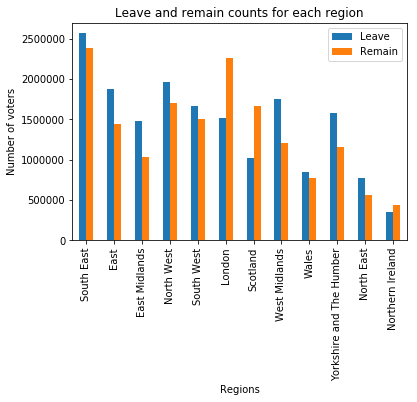

In [17]:
# Simple plot of the data
ax = counts_df[['Leave', 'Remain']].plot(kind='bar')
ax.set_title('Leave and remain counts for each region')
ax.set_xlabel('Regions')
ax.set_ylabel('Number of voters')

In [18]:
# Get percentages for turnout, leave and remain for areas in East region
east_df = pd.DataFrame(list(results.find({'Region':'East'},
                                            {'_id':0, 'Area':1,'Pct_Leave':1, 'Pct_Remain':1, 'Pct_Turnout':1})))
east_df

,Area,Pct_Leave,Pct_Remain,Pct_Turnout
0,Peterborough,60.89,39.11,72.35
1,Luton,56.55,43.45,66.31
2,Southend-on-Sea,58.08,41.92,72.90
3,Thurrock,72.28,27.72,72.75
4,Bedford,51.78,48.22,72.06
5,Central Bedfordshire,56.13,43.87,77.89
6,Cambridge,26.15,73.85,72.22
7,East Cambridgeshire,50.92,49.08,77.08
8,Fenland,71.39,28.61,73.69
9,Huntingdonshire,54.24,45.76,77.82


In [19]:
# Find all areas in East region which voted remain
# See https://docs.mongodb.com/manual/reference/operator/aggregation/ for expression operators
east_remain_df = pd.DataFrame(list(results.find({'Region' : 'East', 'Pct_Remain': {'$gt': 50.0} },
                                            {'_id':0, 'Area':1,'Pct_Leave':1, 'Pct_Remain':1, 'Pct_Turnout':1})))
east_remain_df

,Area,Pct_Leave,Pct_Remain,Pct_Turnout
0,Cambridge,26.15,73.85,72.22
1,South Cambridgeshire,39.77,60.23,81.21
2,North Hertfordshire,45.63,54.37,78.27
3,Norwich,43.76,56.24,69.12
4,St Albans,37.29,62.71,82.51


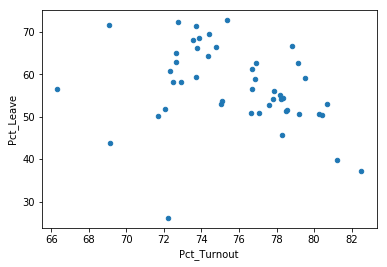

In [20]:
# Plot % leave vote v % turnout
east_df.plot(kind='scatter', x='Pct_Turnout', y='Pct_Leave')

In [21]:
# Null Hypothesis
# There is no relationship between the % turnout and % voting leave in the East region
scipy.stats.pearsonr(east_df['Pct_Turnout'], east_df['Pct_Leave'])

(-0.3019568738589119, 0.039132299564749784)

There is a weak negative correlation (-0.3019568738589119) which is statistically significant (p = 0.039132299564749784) (p < 0.05 usually used for significance).

In [22]:
# Looking at Yorkshire and The Humber...
yorks_df = pd.DataFrame(list(results.find({'Region':'Yorkshire and The Humber'},
                                            {'_id':0, 'Area':1,'Pct_Leave':1, 'Pct_Remain':1, 'Pct_Turnout':1})))
yorks_df 

,Area,Pct_Leave,Pct_Remain,Pct_Turnout
0,"Kingston upon Hull, City of",67.62,32.38,62.94
1,East Riding of Yorkshire,60.40,39.60,74.81
2,North East Lincolnshire,69.87,30.13,67.94
3,North Lincolnshire,66.30,33.70,71.92
4,York,41.96,58.04,70.69
5,Craven,52.83,47.17,81.02
6,Hambleton,53.66,46.34,78.45
7,Harrogate,49.03,50.97,78.89
8,Richmondshire,56.78,43.22,75.15
9,Ryedale,55.26,44.74,77.22


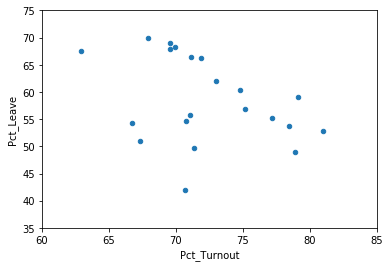

In [23]:
# Plot the data
yorks_df.plot(kind='scatter', x='Pct_Turnout', y='Pct_Leave', xlim=(60,85), ylim=(35,75))

In [25]:
# Null Hypothesis
# There is no relationship between the % turnout and % voting leave in the Yorkshire and The Humber region
scipy.stats.pearsonr(yorks_df['Pct_Turnout'],  yorks_df['Pct_Leave'])

(-0.36604699496595228, 0.10269214068513551)

There is a weak negative correlation (-0.36604699496595228) which is NOT statistically significant (p = 0.10269214068513551).